In [3]:
import pandas
df = pandas.read_csv(r'.\machine.csv')
print(df)

      vendor          model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser          32/60   125   256   6000   256     16    128  198  199
1     amdahl         470v/7    29  8000  32000    32      8     32  269  253
2     amdahl        470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl        470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl        470v/7c    29  8000  16000    32      8     16  132  132
..       ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
204   sperry           80/8   124  1000   8000     0      1      8   42   37
205   sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
206   sratus             32   125  2000   8000     0      2     14   52   41
207     wang         vs-100   480   512   8000    32      0      0   67   47
208     wang          vs-90   480  1000   4000     0      0      0   45   25

[209 rows x 10 columns]


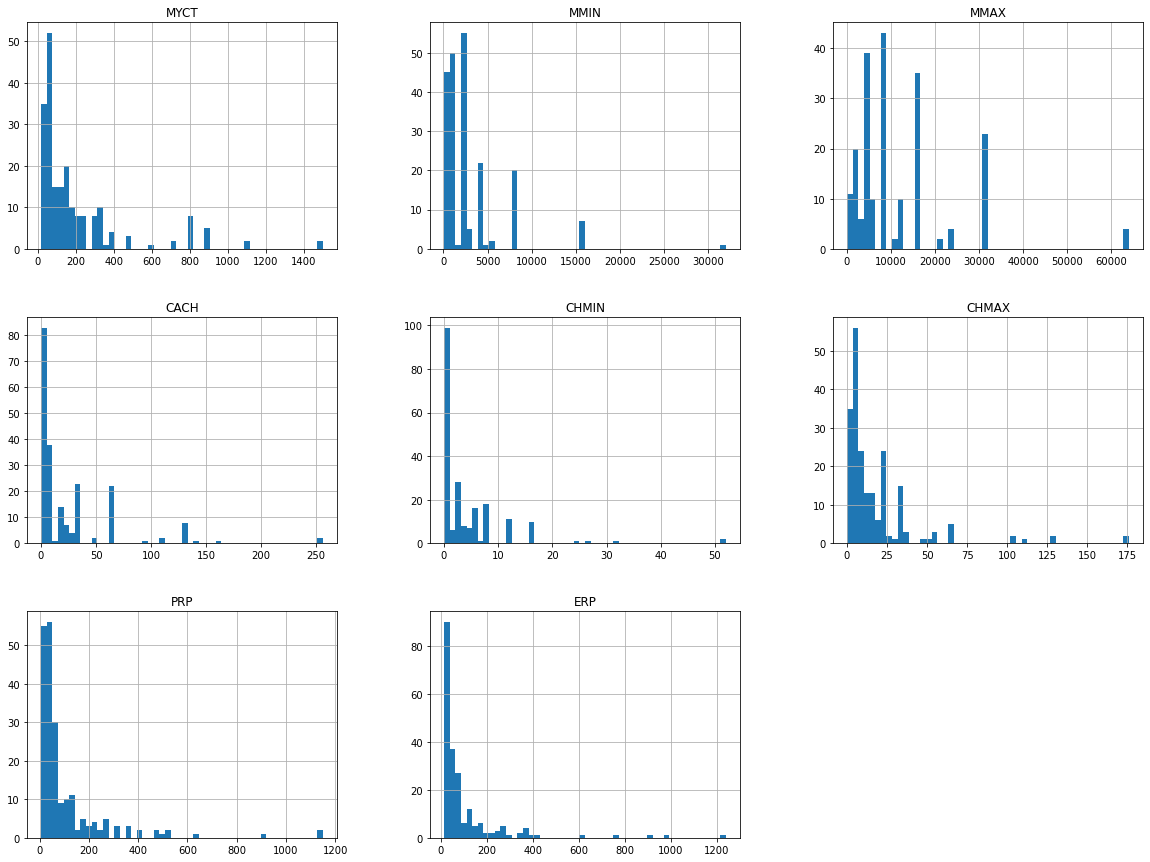

In [4]:
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='MYCT', ylabel='MYCT'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MYCT'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CACH', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MYCT'>,
        <AxesSubplot:xlabel='CHMAX', ylabel='MYCT'>,
        <AxesSubplot:xlabel='PRP', ylabel='MYCT'>,
        <AxesSubplot:xlabel='ERP', ylabel='MYCT'>],
       [<AxesSubplot:xlabel='MYCT', ylabel='MMIN'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MMIN'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CACH', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CHMIN', ylabel='MMIN'>,
        <AxesSubplot:xlabel='CHMAX', ylabel='MMIN'>,
        <AxesSubplot:xlabel='PRP', ylabel='MMIN'>,
        <AxesSubplot:xlabel='ERP', ylabel='MMIN'>],
       [<AxesSubplot:xlabel='MYCT', ylabel='MMAX'>,
        <AxesSubplot:xlabel='MMIN', ylabel='MMAX'>,
        <AxesSubplot:xlabel='MMAX', ylabel='MMAX'>,
        <A

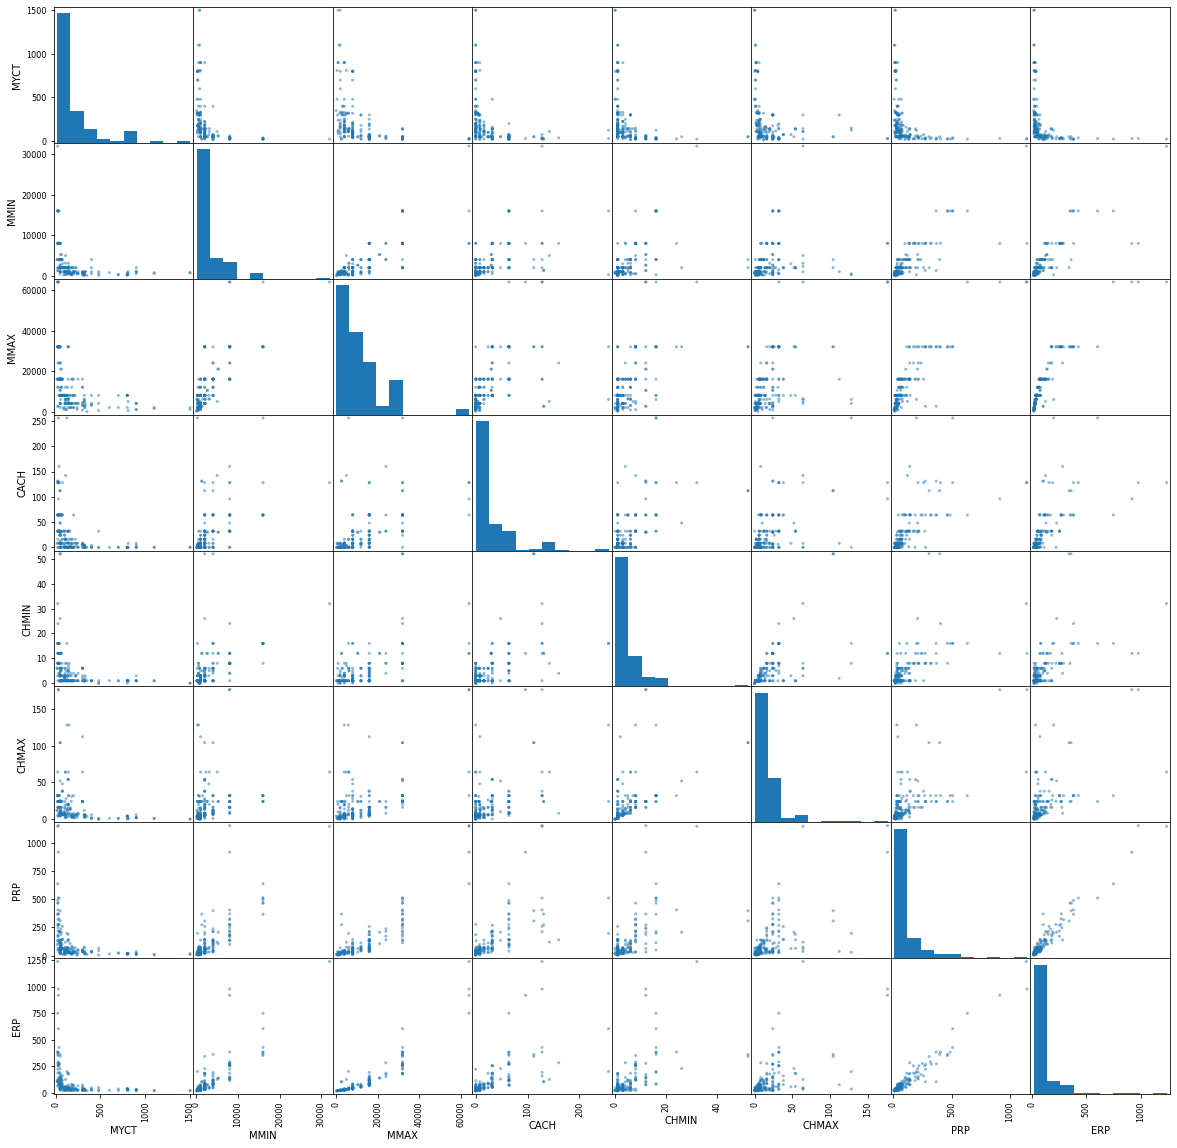

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20))

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print(df['vendor'])
enc = LabelEncoder()
enc.fit(df['vendor'])
df['vendor'] = enc.transform(df['vendor'])
print(df['vendor'])

train, test = train_test_split(df, test_size=0.2)

X_train = train[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_train = train['ERP']

X_test = test[['vendor','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]
y_test = test['ERP']

#from sklearn import preprocessing
#X_train = preprocessing.normalize(X_train, norm = 'l2')
#X_test = preprocessing.normalize(X_test, norm = 'l2')
#print(X_train)



0      adviser
1       amdahl
2       amdahl
3       amdahl
4       amdahl
        ...   
204     sperry
205     sperry
206     sratus
207       wang
208       wang
Name: vendor, Length: 209, dtype: object
0       0
1       1
2       1
3       1
4       1
       ..
204    27
205    27
206    28
207    29
208    29
Name: vendor, Length: 209, dtype: int32


In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 0.5)
ridge_reg = ridge_reg.fit(X_train, y_train)
 
lasso = Lasso(alpha = 0.1)
lasso = lasso.fit(X_train, y_train)

lassoLars = LassoLars(alpha = 0.1)
lassoLars = lassoLars.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge = bayesianRidge.fit(X_train, y_train)

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(X_train, y_train)

decisionTree = DecisionTreeRegressor(max_depth=None)
decisionTree = decisionTree.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=None, n_estimators=10)
bagging.fit(X_train, y_train)

randomForest = RandomForestRegressor(max_depth=None, criterion="mse")
randomForest = randomForest.fit(X_train, y_train)

gradientBoosting = GradientBoostingRegressor(random_state=0)
gradientBoosting = gradientBoosting.fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh = neigh.fit(X_train, y_train)

svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf = svr_rbf.fit(X_train, y_train)
print("rbf done")
svr_lin = svr_lin.fit(X_train, y_train)
print("lin done")

ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_boost.fit(X_test, y_test)
#svr_poly = svr_poly.fit(X_train, y_train)
#print("poly done")


rbf done
lin done


AdaBoostRegressor(n_estimators=100, random_state=0)

In [8]:
print('Linear regression: '+ str(lin_reg.score(X_test, y_test)))
print('Ridge regression: '+ str(ridge_reg.score(X_test, y_test)))
print('Lasso: ' + str(lasso.score(X_test,y_test)))
print('LassoLars: ' + str(lassoLars.score(X_test, y_test)))
print('BayesianRidge: ' + str(bayesianRidge.score(X_test, y_test)))
print('Polynomial regression: ' + str(poly.score(X_test, y_test)))
print('Decision Tree: '+ str(decisionTree.score(X_test,y_test)))
print('Bagging: '+ str(bagging.score(X_test,y_test)))
print('Random Forest: '+ str(randomForest.score(X_test,y_test)))
print('Gradient Boosting: '+ str(gradientBoosting.score(X_test,y_test)))
print('KNeighbors: '+ str(neigh.score(X_test,y_test)))
print('SVR with radial kernel function: ' + str(svr_rbf.score(X_test, y_test)))
print('SVR with linear kernel function: ' + str(svr_lin.score(X_test, y_test)))
print('Ada Boost: ' + str(ada_boost.score(X_test, y_test)))
#print('SVR with polynomial kernel function: ' + str(svr_poly.score(X_test, y_test)))

Linear regression: 0.7432958160331022
Ridge regression: 0.743296532767636
Lasso: 0.7433854714715425
LassoLars: 0.7426917421687194
BayesianRidge: 0.7517147752700138
Polynomial regression: 0.9981191396560792
Decision Tree: 0.930082982511045
Bagging: 0.8631769812468881
Random Forest: 0.8631427964631165
Gradient Boosting: 0.9062030490193597
KNeighbors: 0.9422923778153873
SVR with radial kernel function: -0.0016522590746306243
SVR with linear kernel function: -1395.0551841498398
Ada Boost: 0.9920444961593647


In [9]:
poly.predict(X_test)

array([ 95.16384525,  51.2526329 , 177.12174789,  41.06031074,
        32.29491878,  26.50005374, 145.61367593,  20.80324322,
        68.43927851,  63.53606698,  19.60381061, 133.70310595,
        56.15182875,  30.26082852,  38.3272727 , 245.38776052,
        29.45797054, 273.74295103,  57.97016879,  86.33118909,
        21.24984101,  27.42339784,  21.07913175, 353.38595653,
        29.75944752,  43.12219137,  34.64697198,  72.86492778,
        65.96400404,  92.85901198,  20.23226209,  53.39421815,
        71.56103413,  24.96536414,  18.13920755,  49.26176999,
        23.46285782,  35.86635275,  23.89467263,  22.55320278,
       112.57015858, 276.21084075])

In [10]:
print(y_test)

144     95
75      52
194    182
161     41
69      33
84      25
35     136
104     20
52      72
163     62
72      20
4      132
55      56
39      30
131     37
3      253
85      28
191    275
118     59
93      82
103     20
117     26
102     18
96     350
125     30
184     41
50      34
165     80
175     64
31     102
67      20
23      45
32      74
200     24
157     19
205     50
208     25
48      36
11      24
18      22
98     113
168    281
Name: ERP, dtype: int64


In [14]:
#Results Visualization
import matplotlib.pyplot as plt
rowIds = []
for i in range(42):
    rowIds.append(i)

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, lin_reg.predict(X_test), color = "red")
plt.title("Linear regression (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, ridge_reg.predict(X_test), color = "red")
plt.title("Ridge regression (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, lasso.predict(X_test), color = "red")
plt.title("Lasso (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, lassoLars.predict(X_test), color = "red")
plt.title("Lasso LARS (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, bayesianRidge.predict(X_test), color = "red")
plt.title("Bayesian Ridge (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, poly.predict(X_test), color = "red")
plt.title("Polynomial regression (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, decisionTree.predict(X_test), color = "red")
plt.title("Decision tree (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, bagging.predict(X_test), color = "red")
plt.title("Bagging (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, randomForest.predict(X_test), color = "red")
plt.title("Random Forest (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, gradientBoosting.predict(X_test), color = "red")
plt.title("Gradient Boosting (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, neigh.predict(X_test), color = "red")
plt.title("KNeighbors (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, svr_rbf.predict(X_test), color = "red")
plt.title("SVR with radial kernel function (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, ada_boost.predict(X_test), color = "red")
plt.title("Ada Boost (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")
plt.ylabel("ERP")
plt.show()

plt.plot(rowIds, y_test, color = "blue")
plt.plot(rowIds, svr_lin.predict(X_test), color = "red")
plt.title("SVR with linear kernel function (blue - actual value, red - predicted value)")
plt.xlabel("Test set row Id")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZMAAAEWCAYAAACjYXoKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXmYHFW5/z9v92zdM5PMmsxkIyt72IQksomgBr16QbwX%0AEFRQFHfFKyLeqxe5ihd/XvWKuONVUMAFxAUU1AQIICFACAQSAlnIMtlm0rN2z9bd7++PUzXTM9Pr%0ATPd0DZzP88zTXVWnqk7VVJ9vve97zntEVbFYLBaLZSL4il0Bi8VisUx9rJhYLBaLZcJYMbFYLBbL%0AhLFiYrFYLJYJY8XEYrFYLBPGionFYrFYJoznxUREzhCRLcWux1RFRC4Vkb8W6NjlIrJJRJqd5Z+L%0AyFfTlFcRWVyIukwFMt2fCRz3IRH5YL6Pm29EZL7zDJQUuy7JEJHLReTRhOUeEVk4CectyP9PRF4R%0AkTfl4TifFJGvZyrnGTFJdeGq+oiqHlGMOr0aUNXbVfUtBTr8lcAaVd1XoOMXFRH5soj8stj1sBQH%0AVa1S1e3pynhdIPPET4BLRWRGukKeEROvkc3Dke8HaAo+kB8BflHsSlgmHzF4tv2Ygr8lz6KqfcBf%0AgPelK+fZh8FFRM4SkT0Jy6+IyNUi8pyIdIrIr0WkImH720Vkg4h0iMg/ROS4hG3Xisg2Eel23DPv%0ATNh2uYg8JiLfFpFDwJeT1OXLInKXiPxSRLqAy0XEl3DcQyLyGxGpS9jnfSKy09n2pUQLLNfjiUiF%0AU/aQc31PisjMhPpvd65th4hcmrA+0XQ/1dmv0/k8NWHbQyLyFec+dIvIX0WkIcX/ZR6wEHhi1KYG%0AEfmbs//DInJYiv1HmPZJ6nmkc5yQiGwRkQuTHScbRGSZiDzu3LN9InKziJQlbD8m4VwHROTfReRc%0A4N+Bixx3x7NO2REW9GjrRUR+KyL7nfu7RkSOyaJ+5U7djk1Y1ygivSIyQ0RqReReEWkVkXbn+5wU%0AxxpdnxFvziIyXUR+6tyHFhH5qoj4s7yPD4nIDSLyGBABFqY7noj4ReR/RKRNRLYD/5TNedKc/+ci%0A8sNUz5dznR8XkZeBl511KZ8jEakXkT+KSJeIrAMWjTrfkFtWRAIi8k0xv+VOEXlURALAGqd4h/Oc%0AvN4p/wER2ez8vx4YVc83i8iLznFuBiTF9c5ynoHE9uRE536WisgiEVktpj1oE5HbRaQmzb37asLy%0A6HZ1lojc7TxjO0TkU6MO8RAZ/n+eF5MUXAicCywAjgMuB3Ojgf8DPgzUAz8C/igi5c5+24AzgOnA%0A9cAvxfH3OywHtgMzgRtSnPs84C6gBrgd+CRwPvAGYBbQDnzPqc/RwPeBS4Fm57yzx3s84DLnGHOd%0A6/sI0CsilcBNwFtVtRo4FdgwuuLOQ3mfU7Ye+BZwn4jUJxS7BHg/MAMoA65OcR+WAttVNTpq/aXA%0AV4AGpw63p9g/Jc71/A24w6nHxcD3nfs5HmLAZ5w6vR44B/iYc65q4O/A/Zj7vRhYpar3A18Dfu24%0AO47P8lx/AZY49V5PFtevqv3A74B3J6y+EHhYVQ9ifqc/Aw4D5gG9wM1Z1mc0PweimOs8EXgLkIu/%0A/r0Y92Y1sDPD8T4EvN1ZfzLwL+OscyKZnq/zMb/jo7N4jr4H9GF+mx9w/lLxP8DrML+tOuAaIA6c%0A6WyvcZ6Tx0XkPMyLyAVAI/AIcCeAmJez3wFfdK5hG3BashOq6l7gceBdCasvAe5S1UGMCP035rk9%0ACtMufDnNNSRFjIX5J+BZTPt0DnCViKxMKLYZSP8bUFVP/AGvAG9Ksv4sYM+ocu9JWP5/wA+d7z8A%0AvjJq/y3AG1KccwNwnvP9cmBXhjp+GRMjSFy3GTgnYbkZGARKgP8E7kzYFgQG3Oscx/E+APwDOG7U%0APpVAB+ahC4zadjnwqPP9vcC6UdsfBy53vj8EfDFh28eA+1Pci0uBtaPW/Rz4VcJyFaYhn+ssK7A4%0A4VwfTFHPi4BHRh37R8B1eXrWrgLucb6/G3gmzf/7l+me02RlErbVONc8PeH+fDVF2TcB2xKWHwPe%0Al6LsCUB7wvLQvRxdH2C+U4cSzEtSf+Iz4lz/g1net4eA/0pYTns8YDXwkYRtb3HrMs7/WzbP19kJ%0A21M+R4Af87s6MmHb19xnMPF5xYh5L3B8kjoN3d+EdX8BrkhY9mEsucMwrqK1CdsE2EPCb2HU8T8I%0ArE4ouxs4M0XZ8xOf5cRndfSzR0K7ihHfXaOO9QXgZwnLS4BYuv/PVPUr7k/4HsEoM5h/1mUi8smE%0A7WXudhF5H/BvmAcAzMOY6MbZncW5R5c5DLhHROIJ62KYH9qsxPKqGhHjQhvv8X6Befv4lWPO/hL4%0AD1UNi8hFGCvip44b4rOq+uKoY8/CvE0mspOR1tLoe1tFctoxb6ejSbzeHhEJMeo+ZMFhwHIR6UhY%0AV0KS+IyInIH58QLsVNUxbiURORxjhZ2MEfQS4Gln81zM2+GEcdw7NwD/inkjdf+HDUBnht0fBIIi%0Ashw4gBGMe5zjBoFvY6zxWqd8tYj4VTWWQxUPA0qBfSJDnhUfuf1vEstmOt7o//voZ28IMW7ZHzmL%0Aj6jqWzOdP8XzNbp+qZ6jRud7NvVrACrI/jk5DPiOiHwzYZ1gfmej2wQVkXT3/27gu44H5XDMM/UI%0AgBgX93cw3pZqzL1vz7KOo+s7a9R98rvncagmwzM8VcUkFbuBG1R1jIvK8Vn+BGPCPa6qMRHZwEh/%0AZTYplEeX2Q18QFUfS3LOfcARCcsBjHtpXMdzuB64XkTmA3/GWF4/VdUHgAecc3wVc61njNp3L+bB%0ASWQexsWTK88BC0SkREe6uua6X0SkCuMS2Jtk/zCmYXdpSvi+G+PieXOmSqjqI6QWPJcfAM8A71bV%0AbhG5imGXy26M+yPp4XOs9yUYt+WbMG+F0zE/7qQ+8REnMs/jbzBv9geAe1W129n8WcxztFxV94vI%0ACc71JDtupvvaDzToWPdktiTek0zH20fC84B51pIfVPV2snOJZnq+Rtcv6XPkCH/UOZ770pWqfm0Y%0Ad9gijCtoRNWTlHfboTHXIyJLRl2DMPIejTy4aruYrv0XYVxZv1LHVMBYUgosVdWQiJxPavdnpudi%0Ah6ouSVUP59yjr30EXouZlIoJMrt/uYrdT4CPiMhyMVSKyD85fvFKzI1vBRCR9wPHpjlWtvwQuMEN%0AsIkJnJ7nbLsLeIeYoHcZxgWRqWFJeTwReaOILHV+CF0YMz0uIjNF5DzHR9wP9DD8VpzIn4HDReQS%0AESlxrJmjgXtzvWhV3QNsBZaN2vQ2ETndud6vYEz6ZG9eG4ALRCQoJsh5RcK2e516vtcJNJaKyCki%0AclSu9XSoxtyvHhE5EvjoqHM1i8hVYgLh1Y51AKZRny8jey1tAC526jQ6DlCNuf+HMD/cr+VYzzsw%0AjcalzvfE4/Zigrx1GDdNKjYAZ4rIPBGZjnFXAKCmC/dfgW+KyDQxnT0WicgbYESwfn42lc10POA3%0AwKdEZI6I1ALXZnPcDGT7fEGa58ix6H4HfNl5Bo/GxCSTXWccE4v9lphAtV9EXi8mFtuK+a0ljkf5%0AIfAFcTpfiOmk8K/OtvuAY0TkAqd9+xQjG/Zk3IFxj/0LY5+LHqBTRGYDn0tzjA2Ye1cnIk0YV6/L%0AOqBbRD4vpqOBX0SOFZFTEsq8gWEPQFK8JiZ/xvxo3L8v57Kzqj6FCfrdjHkj3IoTnFfVTcA3MTGC%0AA5gAcqq3/1z4DvBH4K8i0g2sxfggUdUXMAH1X2He0nqAg5gGJ+fjYR66uzAN42bgYYzJ7sO47/YC%0AIcw//qOMQlUPYQKin8U0eNcAb1fVtvFdOj/CxGESuQPT2IUwAcv3pNj325j40QHgVhLeSp038rdg%0ALIa9GNfb14HysYfJiqsxVkM35oXj16PO9WbgHc55Xgbe6Gz+rfN5SETWO9+/hHlDbcdYiYk/7tsw%0ArpIWYBPmf5c1qvoE5g1yFiN/uP8LBDBvyGtJY0mq6t+c63sO48ob/aLwPozrd5NzDXdh4nJg3pDd%0A+mdLuuP9BHgA80a7HtN4T5Rsn69snqNPYKza/ZiYws/SnPdqYCPwpHPurwM+VY1gXJuPiemRt0JV%0A73G2/0pML83ngbc6dWrDuEFvxPwGl5C5HfqjU26/qiZaB9cDJ2HcT/eR/v7+AvN/eAXzApD4G4hh%0A2oUTgB2Y5+wWjGWNmN6yb8P8TlMiwxaTpdA4ZnkHsERVdxS7PhPFeTN7BtNh4FU5cPG1hIh8EWhV%0A1R9lLFwEROTnmKDxF4tdl9cSYmLQc1X1mrTlrJgUFhF5B7AK4976JsbKOEntjbdYcsKKibfxmpvr%0A1ch5GBN7L8ZUvdgKicViebVhLROLxWKxTBhrmVgsFotlwkzpcSYNDQ06f/78YlfDYrFYphRPP/10%0Am6o25vOYU1pM5s+fz1NPPVXsalgsFsuUQkRSZiMYL9bNZbFYLJYJY8XEYrFYLBPGionFYrFYJowV%0AE4vFYrFMGCsmFovFYpkwVkwsFovFMmGsmFgsFotlwlgxmSq88AI88kjmchaLxVIEpvSgxdcU119v%0ABOWFF4pdE4vFYhmDtUymCl1d0NNT7FpYLBZLUqyYTBXCYYhEil0Li8ViSYoVk6lCJAK9vcWuhcVi%0AsSTFislUwbVM7PwzFovFg1gxmSq4QtLfX+yaWCwWyxismEwVwmHzaV1dFovFg1gxmSq4wXcbhLdY%0ALB7EislUIB6Hvj7z3YqJxWLxIFZMpgKJAmLFxGKxeBArJlOBRAGxMROLxeJBrJhMBdzgO1jLxGKx%0AeBIrJlMB6+ayWCwex4rJVCDRMrFuLovF4kGsmEwFrGVisVg8jhWTqYCNmVgsFo9jxWQqYHtzWSwW%0Aj2PFZCpgLROLxeJxrJhMBWzMxGKxeBwrJlMB1zLx+62by2KxeBIrJlMB1xqpr7eWicVi8SRWTKYC%0A4TBUVEBlpRUTi8XiSayYTAUiESMkwaB1c1ksFk9ixWQqEIkYIQkGrWVisVg8iRWTqUA4bIQkELBi%0AYrFYPIkVk6mAdXNZLBaPY8VkKuBaJtbNZbFYPIoVk6lAomVixcRisXiQgouJiPhF5BkRuddZrhOR%0Av4nIy85nbULZL4jIVhHZIiIrC123KUNizMS6uSwWiweZDMvk08DmhOVrgVWqugRY5SwjIkcDFwPH%0AAOcC3xcR/yTUz/tYy8RisXicgoqJiMwB/gm4JWH1ecCtzvdbgfMT1v9KVftVdQewFVhWyPpNGWzM%0AxGKxeJxCWyb/C1wDxBPWzVTVfc73/cBM5/tsYHdCuT3OuhGIyJUi8pSIPNXa2lqAKnsQ1zIJBGBw%0AEKLRYtfIYrFYRlAwMRGRtwMHVfXpVGVUVQHN5biq+mNVPVlVT25sbJxoNb2P6kjLBGzcxGKxeI6S%0AAh77NOCfReRtQAUwTUR+CRwQkWZV3ScizcBBp3wLMDdh/znOutc2AwMQjw/HTMBYKtXVxa2XxWKx%0AJFAwy0RVv6Cqc1R1PiawvlpV3wP8EbjMKXYZ8Afn+x+Bi0WkXEQWAEuAdYWq35TBTT/v9uYCGzex%0AWCyeo5CWSSpuBH4jIlcAO4ELAVT1BRH5DbAJiAIfV9VYEernLVzhSLRMrJvLYrF4jEkRE1V9CHjI%0A+X4IOCdFuRuAGyajTlOGRMsk0c1lsVgsHsKOgPc6iZaJdXNZLBaPUgw3lyUXHOG45Y4gW1qCfAOs%0Am8tisXgOKyZex3FzvbgryAs7rZvLYrF4E+vm8jqOcLT1VnIoYt1cFovFm1gx8TqOZXKoN0hr2Pbm%0Aslgs3sS6ubyOY4W0RirpjFrLxGKxeBMrJl7HsUwO9gTppcKss2JisVg8hhUTr+MIx/7uSvooNeus%0Am8tisXgMGzPxOuEw6vfTGysFhHiFTUNvsVi8hxUTrxOJoMFKQACIlQesmFgsFs9hxcTrhMPGGnGI%0AlgWtm8tisXgOKyZeJxIhVl45tDhYat1cFovFe1gx8TrhMINlw5bJoN+6uSwWi/ewYuJ1IhEGS4ct%0Ak/4S6+ayWCzew4qJ1wmHjYA49Pmsm8tisXgPKyZeJxKhzzdsmfSJdXNZLBbvYcXE60Qi9PqMZVJR%0AARGsm8tisXgPKyZeJxwmQiUi0NQEEbVuLsvEicfhhz+Evr5i18TyasGKideJRAhrkOpqmDYNwnHr%0A5rJMnKefho9+FP7yl2LXxPJqwYqJ1wmH6YkHmTYNqqqgO2bdXJaJEwqZz/b24tbD8urBiomXicWg%0Av5+ueCXTpkF1NXRFHTeXarFrZ5nCdHaO/LRYJooVEy/juLO6Bo2bq7oaOgedbsLW2W2ZAFZMLPnG%0AiomXccSkY3DYMukcsBNkWSaOKyIdHcWth+XVgxUTL+NMjNUxEBwSk/YBO3WvZeJYy8SSb6yYeBnH%0A+gj1Vw65udr7giO2WSzjwbVIrJhY8oUVEy/jWCaHeoctk7BaN5dl4ljLxJJvrJh4GUcw2nqHYyYR%0ArJvLMnGsmFjyjRUTL+NYJj063JtrSEysZWKZAFZMLPnGiomXcQQjzLBl0ot1c1kmju3NZck3Vky8%0AjGOZRAhaN5clryRaJnb8qyUfWDHxMgmWiXVzWfKJKyaDg3b8qyU/WDHxMo5gJFom1s1lmSiqRkxq%0Aa82yjZtY8kHBxEREKkRknYg8KyIviMj1zvo6EfmbiLzsfNYm7PMFEdkqIltEZGWh6jZlcNxcvQTG%0AWibWzWUZJ+GwSfs2b55ZtmJiyQeFtEz6gbNV9XjgBOBcEVkBXAusUtUlwCpnGRE5GrgYOAY4F/i+%0AiPgLWD/vE4kQLQug+KxlYskbrnhYMbHkk4KJiRp6nMVS50+B84BbnfW3Auc7388DfqWq/aq6A9gK%0ALCtU/aYE4TCDpcYScVPQxygh5i+1YmIZN6PFxPbosuSDgsZMRMQvIhuAg8DfVPUJYKaq7nOK7Adm%0AOt9nA7sTdt/jrBt9zCtF5CkReaq1tbWAtfcAkQgDpWb+9+pq8PshGISBEjuniWX8WMvEUggKKiaq%0AGlPVE4A5wDIROXbUdsVYK7kc88eqerKqntzY2JjH2nqQcJh+f5CSEjP/OxhR6ffbqXunFJs2wVFH%0AgUdefjo7oZIeLvrDu2linxUTS16YlN5cqtoBPIiJhRwQkWYA5/OgU6wFmJuw2xxn3WuXSIQ+nxmw%0AKGJWVVVBv89O3TuleOopePFFeP75YtcEMGJyIs9w2D9+xZmseXWIya5dcOKJ8Morxa7Ja5ZC9uZq%0AFJEa53sAeDPwIvBH4DKn2GXAH5zvfwQuFpFyEVkALAHWFap+U4JwmF4xqVRcqquhV6yba0rhzpG7%0Af39x6+HQ2Qm1mPl66wm9OsTkT3+CDRtg/fpi1+Q1S0kBj90M3Or0yPIBv1HVe0XkceA3InIFsBO4%0AEEBVXxCR3wCbgCjwcVWNFbB+3icSIUwd06YNrzI9uqyba0rhQTGpw9SpufwQba8GMVmzxny2tRW3%0AHq9hCiYmqvoccGKS9YeAc1LscwNwQ6HqNOUIh+nROWPEJKLWzTWl8JiYdHRAvbSDQnNZiK1TvTeX%0AqhUTD2BHwHuZSISeeOUYN1dP3Lq5phSumBw4UNx6OHR2QlO5cXM1+l8Fbq6tW4eF2opJ0bBi4mXC%0AYbqiwTGWSXfcurmmFB6zTDo7YWapqVO9L/9icuON8PDD+T1mWlyrpKzMikkRsWLiZSIROqKVY8Uk%0Aat1cUwoPikmD31gmdXoo72LyX/8Ft92W32OmZc0aaGiA446zYlJEChmAt0wEVQiH6SwZ25urKxpE%0Ae3uR4tXOkgseFJN6MXWaHsuvZdLba/4mtU1fswbOPNOc2CNjeV6LWMvEq/T3gyrtg2Mtk4jtzTW1%0AcMWktdVkWCwynZ1Q43QNrh7Mr5i0m8Ny6FD+jpmW3bvN2JIzzzTWibVMioYVE6+SkH5+zDgTrJtr%0AyhCLme5TDQ0Qj3uisevshGkx0+pX9ofoaNe8TZDl6uakXeYjj5hPKyZFx4qJV3HSz7tT9rq4lolE%0Ao2ZmI4u3cacyPPpos+wBV1dnJ1QNmFbfH48SjHfn7d1k0sVkzRqTBfW444yY9PTY2b6KhBUTrzJq%0AYiwXO6fJFMNpXTfhDTFRhc4OJdjfDs3NgBnAmC9Xl+vmam+fJI/emjVw+ukmC2pDg1k3aT42SyJW%0ATLxKwvzvo91cdureKYQjJj9Y4w0x6emBoPbg1xgsWgTkV0xcyyQen4TU9gcPwubNxsUFw2JiXV1F%0AwYqJV0mY/31sOhU7QdaUwWldN3OUWS6ymCSmUmHxYqAwYgKT0KY/+qj5tGLiCayYeJUEy8S6uaYw%0ATuu6i3kMllcWfRR8YpJHV0zqyd9Yk0QxKbi3ac0aCATgda8zy1ZMiooVE6+SYJlYN9cUxmldQ9TR%0AFWzylmWS4ObKl0tqUi2TNWvg9a83I9/BikmRsWLiVdJYJtbNNYVwXs87qCFU5g0xGbJMChQzcSdy%0AK6hl0tlpUs67Li6gu7TOfLFiUhSsmHiVFJZJMGjdXFOKUIiekunEKOGgeExMZs5Eq6ryLiaO96yw%0Abfpjj5muaY6YPPss1DaWEJ1Wa8WkSKQVExGZISL/KyL3ish/i8i0dOUtecSxTGJlwSErHsDnAwLW%0AzTVlCIXo8Jk35j0xb4jJkJurthbq6mjIc8xk3rxJyLm4Zg2UlsLy5QD8/e+mK3IkYAcuFotMlslt%0AQBj4LlAF3FTwGlkMjlD4p1WO2eSvsm6uKUMoREiNmOzqm2kGYPT3F606rmWiJSVQVYXU1TGjJL+W%0ASX29+Suom+uRR+CUU4ypDqxda1Z3lVsxKRaZxKRZVf9DVR9Q1U8Cx01GpSxAOExUSghOLx2zyVdl%0A3VxThlCIgzEjJlt7msy6gweLVp2ODqiTdmOViEB9PQ15nNOkvR3q6gqc2SQSgSefHBEvccWk3WfF%0ApFhkjJmISK2I1IlIHeAftWwpFJEIff6R8RKXkmnWzTVViB8K0RavY/Zs2KuOmBTR1eXOZSJ1zs+3%0Ari5vvbmiUceNVmgxeeIJk0rojDMA2LPH/AEc1EYrJkUiUwr66cDTMCLb+XrnU4GFhaiUBQiH6fON%0A7MnlUjrNurmmCnooRIg6li6F/S3eEJMGn2OZANTVURvPT8zEFaS6OuPmev75iR8zKWvWGKvqtNMA%0Aoy3uefcONEB7mwnOi52kYTJJKyaqOn+S6mEZTSRCRJJbJhXTy4kj+Kyby9vE4/g6hsXkzvu9ISZ1%0AEoLamWZFXR3ToiE6OxQmOEOOO8ak4JbJmjVwwgkwfTpgXFzl5bByJez8c4NJ9BiJQOXYeKOlcIyr%0Aa7CIHC4iP8l3ZSwJRCKENbllUj1N6BU7p4nn6e5G4vEhMTnIDLO+iKPgOzuhRp3ABkB9PSUaJdrR%0AM+FjhxI6iTU0mOV4fMKHHcnAADz++Jh4yUknwfz5sKPLDlwsFpm6Bh8nIn8VkedF5Ksi0iwidwOr%0AgU2TU8XXKOEwPfHK5GJi5zSZGiSMfj/mGBignN5AbdEtk2mxkW4uAF9HKM1e2ZFomdTXFyjZ49NP%0Am44njpgMDsJTT8GKFTB7NhxUR0zsjIuTTibL5CfAHcC7gFZgA7ANWKyq3y5w3V7bRCJ0x4NJ3VxD%0AKVWsm8vbJIjJ3LnGK9NRUdyxJt0dMaoGO4YtE+ezrPvQhCfIGu3mggIYCGvWmE8n+P7cc8artWIF%0AzJoFbVjLpFhkEpNyVf25qm5R1e8AYVW9RlXt7DMFRnvC9MRTuLmqIaxB4mFrmXgap3Vtp47aWjN9%0ASFtJccVEO5xI+yjLpEZD9EzQ0zVpYnLUUdDYCAx3CXYtEysmxSNTb64KETmR4chcf+Kyqq5Puadl%0AQsR7ImPSz7u4bq5YV8Tmw/EyTusam15HSYkRk31tTSzdv64o1YnHwd/lpFJxxaS+HhjOz5XMEs4W%0AV0xqaoYOm9+Bi7GYSTv/7ncPrVq71tzXuXPN/FhWTIpHJjHZD3wrxbICZxeiUhbQcHjMxFgurpsr%0A1tPL2CGNFs/gtK5Sb97+m5th99NNRQvA9/RALQnmQ8KnKyZz5oz/+KGQEZLESQ/z2qY/9xx0dY0J%0Avq9YYXoBz5wJ3TKdGH78VkwmnUxdg8+apHpYRhMxlsmsFJZJhCDx8MR74FgKiCMmJY3GCmhuhh2R%0AmRDtMS17VdWkVmdEkkfXMnE+8zGnSXtCJ7GCzKA7Kl7S1gZbt8KHPmRWl5TAjCYfPe31TLdiMulk%0A6s11TcL3fx217WuFqpQFfL3hMennXVw3l9qYibcJhYj4Kpk+oxxwLJOoM9akCNbJmCSPAOXlxAKV%0AeckcHAoNi0lVlcnDmNc2fe1aOOww49NieLDiihXDRWbNgo4Sm1KlGGRyuV+c8P0Lo7adm+e6WFyi%0AUXyDA2PSz7vY3lxThFCIdqkbektvaoL9FG/g4gjLpG44G1K8pj5vYuJqlEgBBi5u3QpHHDG0uHat%0Acam5Ey2CCcK3qhWTYpBJTCTF92TLlnzhjB9JZ5lECCK91jLxMhoyeblcMWlu9pCYuK0+5C0/V6Jl%0AAgXIHLxjByxYMLS4di0cf/zIge6zZsG+QSsmxSCTmGiK78mWLfkiYWKsdG4uf58VEy8Tbw1xSFOI%0ASRHdXPGKwPB0iICvoS4vMZPRYpJXy6S72yiTIyaxmHFzJbq4wFgmewcaUCsmk06m3lzHi0gXxgoJ%0AON9xlitS72aZEAlT9iZzc1VVmW2+Aevm8jKxthAhjhrqJtvcbLquxsWHr4iWidbUjljva6yjjhcm%0AJCbxeHIxyVuyxx07zOdCk1t282ajL6PFZNYs2IejYjbZ46SS1jJRVb+qTlPValUtcb67y2l7pYrI%0AXBF5UEQ2icgLIvJpZ32diPxNRF52PmsT9vmCiGwVkS0isjI/lzgFSTFlr4vr5iod7C1A8iNLvpCQ%0ASfLoWibTp0NZhZ+eQGNR3FwdHcYykdqRYiL19dTLxGIm3d3mUSyYm8sVE8cySRysmIg7cFFiMfI2%0ASYslKwo55i0KfFZVjwZWAB8XkaOBa4FVqroEWOUs42y7GDgGE9z/voj4C1g/7+JYJvHyIP4kdyAQ%0AgD5x0tC+6mLHAAAgAElEQVT32WQEnkQVf9dIMREx1kl7WXFGwRs3VzvSMGoqoro6atXNHDw+QqOG%0Ar4CxTA4dytP7ThIxqasbnm/exY6CLx4FExNV3eeOkFfVbmAzMBs4D7jVKXYrcL7z/TzgV6rar6o7%0AgK3AskLVz9O4CRxTpNAWMUIzoqzFW0Qi+AYHRogJmB5dB3zFE5N6f/sYy4S6OsoYZCA0/nFLqcQk%0Ab8ket283JrlzgsTBionY/FzFY1KycYjIfOBE4AlgpqruczbtB5yJFZgN7E7YbY+z7rWHIxBD0/Mm%0AIR6wU/fmiipcdhk8/PAknCwhyWOimDQ3Q0usOKPgOzuhnlGBDRhajreNP3Nw+9gex/lNqeL25BKh%0AsxM2bRrr4gLTSa27zIpJMSi4mIhIFXA3cJWqdiVuU1Ulx15hInKliDwlIk+1vlrTTDtuLqlKPbmP%0ABOxsi7kSCsFtt8Ef/zhJJ8MkeaypGV7d3Ay7+mYay2SiaXpzpLMTpmv7yG7BMNTqTyQNfSrLBPLU%0Apid0C37ySXPrkomJCPhnWjEpBgUVExEpxQjJ7ar6O2f1ARFpdrY3Awed9S3A3ITd5zjrRqCqP1bV%0Ak1X15EYnc+irDkcgSqentkyotG6uXGlxnqa9eyfhZE7rGp1WNyLu1dwMr/Q3mUme8j7ZR3rC7QME%0A4+GxYuIoQEnXxMUk8dB5S6miOkJM1q41orEshRO8Yo4Vk2JQMDEREQF+CmxW1cRkkX8ELnO+Xwb8%0AIWH9xSJSLiILgCVAcdKrFhvHMkknJr5K6+bKFVdM9u1LXy4vOK2r1o50KRVz4KKGkviiEpbLusff%0A6icTE9fNNeE2vbXVvDQ53YLXrjVZ6J1Ze8dQO7eKAcqsmEwyhbRMTgPeC5wtIhucv7cBNwJvFpGX%0AgTc5y6jqC8BvMDM43g98XFVjBayfd3Etk5rUbi5/tbVMcqUYYuJv9I6Y+DqTjH6HITEJ9IbG3fMq%0AFIJgcMRYyPy5uRJ6cqkOB99TMXuO0EojevBV6gb3KJkGLY4bVX2U1ClXzkmxzw3ADYWq05TBsUwC%0AtanHhZZU25hJrhTDzVU6M42YTHIQ3t+ZxHyAITGpxUyQlSzrQiZGD1gE0/mqtDQPbq4EMdm2zRwv%0ArZjMhlYaaNzfRtkET23JHju3kheJRAgTpHp66n9PyTTr5soVV0x6eswgu4ISCtFHOdUzAiNWFyvZ%0AYzwO5ZEUbq7ycgbLKyeUnyuZmIgYV9eELZPt283n/PkpBysm4nYPju6zbq7JxIqJB4l1pZ4Yy6Ws%0Axrq5cqUloTtHoV1desgZsNg40jhvbIQuqSHqL5tUMenuhppkSR4dBqsmlp8rmZhAnvJz7dgBM2ZA%0AZSVr1xqL5+ijUxd3By7a/FyTixUTDzLYmXrKXpfyGvPGG+2yYpItLS3D40ALLSax1tCYMSZgUqbP%0AbBI6K2ZOqpiMmMskSasfnV43oTT0I8TkzjuHknK5o+AnxKieXMuWkTQzhItrmfjbrZhMJlZMPEi0%0AM/XEWC4VdcYy6e+wbq5s2bsXTjrJfC+0mAweTC4m4CR8LJncUfAj0s8nDnxx0No8iYkqXHEFfOMb%0AQJ7cXI6YRCLw7LPpXVwwLCblkXaIRid4cku2WDHxILGeSMokjy6BOmOZDHRayyQb+vtND9OTTzbL%0AhQ7CD7m5UojJfp3cUfCumESD1WZ+21H4GiY2QdbQlL2dnSaOt20bkAc3VywGu3bBwoWsX2+0IZOY%0ABAIQCTQgqsND8y0Fx4qJB9GezJZJ1XQ//ZQxaMUkK1xL5JhjTPfVQlsm0p5eTHYNTr5lUkeI2PQk%0AgQ1MF+bxxkx6e02+0dpahm/s1q2AsUxCoQkke9yzxyjIggVDwfflyzPvpvV24OJkY8XEi4QzWyZu%0AGvpot3VzZYMbfJ8927hBCm2ZlDoZg92Be4k0N8PO3pnowYPmzXsSSDWXiUtpkzPbYnvuKV5GpFJx%0AxeTAAejupqHBXOK4s8EndAt+8kkTOskm8UVJkxWTycaKiQeRSGbLxBWTeLe1TLIhUUyamwtsmfT1%0AUTIQSWmZNDXBPpqQeHzSGjvXMpG65GJS0mgyB/e2hXM+9ggxSVTpbdsmnlLF7Ra8YAEvvmgsy2wo%0Am2XFZLKxYuJBpC9zb66qKjN1b7zHikk2uGIya9YkiInjp++QumSx7qKMgu/oMJZJSWNyN5c0GBMq%0AejD3/FxJLROArVsnnlJlxw7w+YjPnsvLL8MRR2S3W9V8IyaxA1ZMJgsrJh7E3x/JOM7EtUw0Yt1c%0A2dDSAuXlpsEruJvLaV0HqurwJfmFFUNMXDeXrz65ZeL269W23E2IMWJS5ow737p14ilVduyAuXPZ%0Avb+U3t7sxWT6QqNi4Z1WTCYLKyYepKQ/TITKVHNjAcNiYgctZkdLi3FxubMddnUNZa3JPymSPLoU%0AI6VKZ4caN1d98jq5YiLtebBM5s41vrwEMRm3m8vpFrxli1k8/PDsdmtaEKCHSiK7rJhMFlZMvIYq%0ApYMRomXBpG+1LtXVxs0lfVZMsmHvXiMmYCwTKKCrK9nkHgk0NcEBd064SbJMekO9lDOQdPQ7MFTX%0AofxdOTBGTJqbzXy6+XJzLVw4JCbZWibuWJMBm1Jl0rBi4jX6+vChxCrSmCUYl02vBPH1WTdXNriW%0ACZi2DgovJqMzBruUl0N5XRV9JZWTJibxQ6lTqQBD+eLHM6dJKGQSOlZWMkZMpk0zw1rGJSa9veZ4%0AjmUybRrMnJl5N0hIqXLQislkYcXEazhuKw2kmRjLYbAkiL/fWiaZUC2OmJQ3p3ApOXVoL5/EsSYZ%0ArCVXZCrCufuj3AGLIowUk5YWpDcy/pQqO3eaT0dMjjhi7JzvqZgxAw7RgM+mVJk0rJh4DdeRH8ws%0AJtGyACWDVkwy0d5uBtWNdnMVKgivh0JE8VPVnLoHRVMTHPRNnpiknMvEpaKC/pIggd7xWSa1tZhn%0At7vb3ODFi83G7dvHn1IloVuwKybZ4vdDONBAebcVk8nCionXcAPq6aLvDrGyICWD1s2VicQxJmAa%0AvvLywlkmgweSZwxOpLkZWmKTl1JlyH2VyjIB+oJ1VA2Gch5HOZSXy72hrmUCQ0H4cYmJM2AxMnMB%0Au3fnJiYAA9MaqOy1YjJZWDHxGo5l4qvKbJnEK4KURa1lkonRYiJiLINCWSYD+1OPfndpboZdfTPR%0ASbJMSsMZLBOgv8rk58p1rpekYrJokfnuiMm43Fw7dkBFBS91mZ5vuYpJrK6BymgXDAyM4+SWXLFi%0A4jUcy8Q/LbNlohUBymNWTDIxNGBxZswkdvrtb5k1q3CWSawtdV4ul+ZmaIk3IaGQyUJZQGIxCPRl%0AFpPotPHl50oqJjU1Jsuj06Nr3JbJ/PlseclYeLmKiX+GHQU/mVgx8RqOZTI0k2IaNBikhBgMDha6%0AVlOaIcukZwusWwf33lvYUfCh7MRkaKzJwYMFqoihu9ukUomLL+2cvPGaunHNtphUTGCoR5drmWiu%0Aab8SugWLwJIlue3uplTp3W3FZDKwYuIxNGwsjdKazJaJBO1si9mwd695SS574RmzYuPGgo6C93fk%0AKCYFdnW5o98HgjWkHbxUl/ucJoODjli5ebnKyobjMgljTcaV7DFhwOK8eSa1fC4EDzMZIUMvWTGZ%0ADKyYeIyBdmOZDE3LmwZfpfPrsmKSlqFuwevXmxWbNjFrRpSODjOUId+U9mQWkxFzwRc4CO8meYxW%0ApXZxAfgbnTlNOrI3IdoTp5Xft89cmNt/d/Fi2LWLGdONGy8nb1N7u0koNo6eXC7TF5l/QOc2KyaT%0AgRUTj9EXMsJQUZ/ZMvFVG8FxrRlLcsaISX8/R/heBgrg6hocpLyviw6pY/r01MWKYZnEalL35AIo%0AmVlHOQOED2afZybp6HeXxYtBlblR0ysrpyC805NL549fTOoON2IStilVJgUrJh6j37FMAvWZLZOS%0Aajt1bza0tMDsWQrPPDM0Td/CyEagAGLiBBz6K+vSDrCrroaewAyzMEliQoq5TFzKm4zY9O/LfqzJ%0AGMtktJgATT1moqycLBNHTFqrF9DTMz4xaTraXM9AixWTycCKiccY7DBWRjZiUjrNuLkibdYyScXA%0AgIlvHxPcYVrVSy4Bv5/m1gKJifOqnmpGQxcRqJ9VTk9Z7aSISR0hpCF9nQKzzfbBA9mLiWuZDM2y%0AmERM6tvHLyZb+hcA4xOTafWltFND3KZUmRSsmHiMaFeEAUqprivNWLbUiav0HrJikoqh6XoHHBfX%0AqafCkiXU7DFiknUQ/sABmD8fnngifbkMGYMTaW6GtpLCj4IfmsukIb1lUtpkBsbEWnMXk7rKfrOQ%0AKCZ1dVBTQ/VBIyY5u7lqanihxUwIMx4xEYHO0gYkZMVkMrBi4jGiXeGME2O5lDti0tdu3VypcLsF%0Azw+tNxkHjz0Wli6lbMtGSktzsEweftjkirr33vTlnNbVl8EKACduooUfBd/ZHqeWdspmpheToV5Y%0AoexbfVdMGqKOICaKiQgsXkzZrq25J3tM6BYcDA4POM2VcEUDZV1WTCYDKyYeI96TeWIsl/JaJ2bS%0Abi2TVLhiMqPlGTPna3k5HHccsn07C2f0ZG+ZrFs38jMVTutaMiM7Mdk9WHjLpL+tGz/xzHVyxMSX%0Aw5wmoZDRjOoeR5XdxGcuixcj4xm4mNAt+PDD0/doTkd/dQPBiBWTycCKicfQnuwtk4paEzMZ6LRi%0AkgojFkrVlqfhpJPMyqVLATit5oXsLRNXRJ56Ku3oOz1kGuKKWZnFpKkJ9kQLn1Il2pp59Hvi9lzS%0A0IdCZrC7/+CoAYsuixfDK6/QVD+YvZtLFV55BRYs4KWXxuficonVNTB9oC33AZOWnLFi4jUixjLJ%0ARkyCDcYyiXYV0M31wx/Cs88W7vgFpqUFFpTtxdfWOkZMXlf6XHZiEo3C00+bN/dQaDibbRL694WI%0AI1TNTtMv2MHtHiw9PdDTk83ljIt4W+YkjwAEAvT5ApT15CYmSUe/uyxeDLEYR1fuzN4y2b8f+voY%0AnLuAHTuyn10xGdLYQD1tQ+44S+GwYuIxfJEwvQSpqMhcdlhMCmSZ7N8PH/0ovOMdw31ApxgtLXB2%0ArTPy/cQTzef8+VBZyVGxjdm5uTZtMgNDr7jCLKdxdfXvC9FBDfUz/BkPO2nT97ZnaZkAPeX1BCK5%0AxUyGxMTng8bGkQWcHl1HlW7NXkwcsd5XvoB4fGKWSVlzA0F62bvVWu+FxoqJx/D1RegvqcxqEqCq%0ARuPminUX6Ify4IPmc/du+OAHx5Fcqfi0tMDry9cbx/7xx5uVPh8ceywLejaSVZ5FVzze/36oqIAn%0An0xZdCj9fJrR7y6TJSYZ5zJJoLeijmD/OCyTvXvNNIj+USLqiMlitmbv5nK7BQ+Mv1uwS2Ce+Ucc%0A2mLjJoXGionH8PeHGSzNPMYEoLq+jBg+4uECublWr4bp0+HGG+F3v4Mf/7gw5ykgLS1wXGy9aZGq%0AqoY3LF1KU+tGQDO7up54wjTERx5pXGVpLJP4oXGKSQHjJqXdWbq5MIMtqwfG6eYa7eICM+VhVRXz%0ABrZmn+zREZMNHfOBibm5pi0w/4iOrVZMCo0VE49ROhBhsCxzKhWAklIhQrBw6VRWrYKzzoLPfQ5W%0AroSrroIXXijMuQqAO13v4q71w/ESl6VLqeg5RBP7M4vJunWwbJmxbk45xaRliUaTFpX2zHOZuNTX%0AwyG/M6l5AcWkLIu5TFwGq+uYHg+lurwxtLenGLDo4nQPbg5vJRqFrq4sDrpjB8yaxabtFTQ3p010%0AnJHaJU5KlZ1WTApNwcRERP5PRA6KyPMJ6+pE5G8i8rLzWZuw7QsislVEtojIykLVy+uURcPEyrOz%0ATAD6JFCYRI87dpi/c84xbqFbbzW/6osuKkx2xALQ0QHB3jZqu3cPx0tcnCD8UjamF5NwGJ5/3ogJ%0AmM/e3pSiWtKVvWXi84G/qdGkhi+gmFT0thP1lWY3FXRNPfUcyqrRj8eH539PKSYAixfnNgo+oVvw%0ARFxcMJyGvm+PFZNCU0jL5OfAuaPWXQusUtUlwCpnGRE5GrgYOMbZ5/sikjmC+SqkLBohVpGdZQLQ%0A7w9CXwEa99WrzefZZ5vPmTPhtttMI/rZz+b/fAWgpQVOxAm+J7FMwIhJ2iD8+vWm1XTF5JRTzGeK%0AuEl5T4gOqcv6bXpGs5+O0hmwZ092O+RILAZVgyH6AnVkFYirrcs6c3BXl7k19dOjJmdNGjGpbtuO%0An+iki4mr6rEDVkwKTcHERFXXAKOdr+cBtzrfbwXOT1j/K1XtV9UdwFZgWaHq5mUqYmE0izdIl35/%0AEF9fASyT1auNgBx99PC6lSvh6qvhBz+Ae+7J/znzzN69cBJOGpXRlklDA9rUxHGSwTJx4iN68in8%0A4hcQmbXYDKxIFjeJx6noa6cvmD7JYyLNzbC57HjT9bgAdHWZVCr9lZldXABSbzIHd+3P/Ey53W1n%0AlRw0PsU0YuKLDjKX3ZmD8IODsHs3kZkLCIXyICY1NcTw4TvUOsEDWTIx2TGTmarq/nT3A47DmNnA%0A7oRye5x1YxCRK0XkKRF5qrX1VfaADA5SxiAEs7dMoiUB/P15FhNVIyZnnz32bfaGG+Dkk0032V27%0A8nvePNPSYsRkcO6CpPECOe44Tip5Lr1lsm4dHHYYj2+fyfveBz+5xYmbJLNMOjvxoQxWZw50uzQ3%0Aw+Px5caVVoCxJkNzmUzLrk7+RlMusidzEN4VkyZNMcbEJaFHV0bLZNcuiMdpKZt4Ty4A/H4iFXWU%0AdlrLpNAULQCvqgrk3NdUVX+sqier6smNo/u0T3Wc2IdUZW+ZDJYFKRnIs5tr82bjwz/nnLHbysrg%0AzjvNG+R73pMyEO0FXDeX76QTkxdYupTDo5s40JLmGpzg+z/+YRb/+leMy2vjxrGxqiwzBifS3Ayr%0AI8uNv6gA1ombfj4+LTvLpKzZ9Bzoa8ncj3coL9dgHsXE6cn1cjRPYgL0VTUQ7G2zs1sXmMkWkwMi%0A0gzgfLqTX7cAcxPKzXHWvaaI95jGyV+dvWUSKwtSOphny2TVKvPpxktGs3ixcXU98gh89av5PXce%0AObSji8N5Gf8pJyUvsHQp5dpP6c6tybcfPGjSeixbxuOPm1UPPQSDJ5xighEbNows77SuUp+bmKxz%0APbqZMhKPg6G5TOqyExM3DUw2aeiH0s/3pcjL5dLcjAYCHC5ZjDVxxOTZrgWUlZnxpRMlWtNAA22F%0AToH2mmeyxeSPwGXO98uAPySsv1hEykVkAbAEyJBR79VHuNURk2nZWybx8gBl0TyLyerVsGCB+UvF%0Ae95jenbdeCP09eX3/Hmi4kWnsR8dfHdxgvAN+zYm3+64snTZch5/3OTSikRgbdxp/EfHTZzW1XUV%0AZUNzMxyigb45iwomJnWE8GUpcME5plz0YPZiMpTkcebM5AV9PmTRouxGwe/YASUlPLlvDosXjx0D%0AOR6kwYhJ1kk9LeOikF2D7wQeB44QkT0icgVwI/BmEXkZeJOzjKq+APwG2ATcD3xcVWOFqptXibSa%0AWRZLpmVvmcQDQcpieXRzxWLm9TuVVZLIpZea4eOZMukWifpdo9KojOaoo4iLj8O6NzIwkGT7unXg%0A87Fnxkns22eG2ZSWwr1PN5uc6KPiJm4OrLKm3MQEoG3R8oKISVd7jOl0UdKYnWVSNc/U3U1YmQ5X%0ATAId+0yvqbKy1IUXL2axZCkmhx3G5pf8eXFxAZQ0GzFpec35OiaXQvbmereqNqtqqarOUdWfquoh%0AVT1HVZeo6ptUNZRQ/gZVXaSqR6jqXwpVLy8TcSa5KqvJ3jIhEKRCI/nLdPLMM2aARjZicvrpJkC/%0AZk2eTp5f5rWtpyPYbEyKZAQCdM1YwlI2JneBrFsHxx7LP5414v7mN5u5tR54ABM3GSWifXvN4+zO%0AWJgNbtV2Ni03QZ48t3i9+8w0wtkKXOlMU06ymNOkvR0qK8F/YG/qeInL4sXMHdhGqC2evtyOHcTn%0AL2DbtvzESwACcxuNmOyZeumAphJ2BLyH6Gszlkl5XfaWiQQDBIkQDuepEpniJYnU1prJph55JE8n%0Azx+Dg3BU33oOzE7h4nKILF6afOCi6lDw/fHHIRAwXrGVK00S5e4jT4GtW0lMR9vbYr5XzsnOCoBh%0Az9DmqhSuswkysN9Jid+cZZ0CAXoJ4O/MzjLJOGDRZfFiyrUf//4MYrljB931CxgczKOYzGuglCiH%0AdmQz/N4yXqyYeAh3kquKuuwtE6kKEqCX7u48VWL1ajO2JNXb/GjOPBMee2xye3W99FLGxIgHXunl%0AKDbTc3h6MeHYpSxkOwe3j+qWu327aS0dMTnlFOPiWunkZng85jT+Tz01tMvA/hBdVFPflHnKZZey%0AMpNo94n+E8wJ8uzqirWZVCqlM7IXuM6SuuF8XmnIVUwAprem6OwA0NoKBw+ytyJ/PbkAfI1m4GLX%0Adm91D37gAdMx8tWCFRMPMdBuzItAffZi4qsMEqCP7s4M7oOsKjBgrIxkXYJTccYZJuXIM89M/PzZ%0AEI0aAXvLW0jX17N9zUZKiKHHp4iXOFQsW4oPpX/9qPQojoXQf/wynnkGXv96s/qEE0zjf9eO15kV%0ACXGTaGv2qVQSedOb4O77Kogff0LexWQo9pFFkkeXntI6yiPZiUl9bdx0I89STBo7t6Z2yf77v4Pf%0AzxMz/hnIn5i4/5B1f26btMc0E6rwiU/ARz6SRdbqKYIVEw8x0GEsk2Bj9m6ukmqThj7clocg/Nq1%0AJu9UNi4ulzPOMJ+T5epatcpYJc89B9/4Rspig0+Yke+B09JbJtNPMz26SjaP6tG1bh0EAjzddwyD%0Ag8Ni4vOZ2MnvH6pBDz98pFsqh4zBiVx+uYk/bG9YbiydWB77nuQwl4lLuKKeYG9240wOqzpkBD6T%0AmMyZQ9RfxoL41uR5v/7xD7jlFvjMZ/hH5zE0NOSkf+lx/iELp7fxr/+aZbLJArNxo/GSdnUNZy6a%0A6lgx8RCxLmOZVDZmb5mUTDdlI2156B68erVpLc86a2jV00/DL34B3/sefO1rcO218LGPmZ7B//zP%0A8JlvzDJvnZMVhL/jDpMW/7zz4L/+C7ZsSVqs7Pn1HKKOGSfPS3s4/5KFRCRI1Y4kYvK61/H4kyUA%0ArFgxvGnlSuORCS12gvDOq7avY3xics45pnPY7/ctN6PgN23K7QBp8HXlLiZ9wTqqspjTJBSCw8oy%0ADFh08fvpmbEw+bwmg4PmFX3uXLjuuqF53/OG8w/54ofbeOUVuPLK4k/Nc9dd5qdWWWlmd3g1YMXE%0AQ7iTXFXNzN4yKXPEpDeUB8tk1SozJqOmBjAGwKmnwvveZ0zy//gP+Na34Le/hccfNzkf//d/oe2o%0AM+DRR80o7kLS22t+ee96l5lOOBAwLUOS807f8Qwb5CQaGjMkyfL52B44lsb9CWIyOGgSPDrxkgUL%0ARg6heMtbzOd63ynGxeP0wCrtNkkeE6dNyQa/H977Xrhl43KzIo+urjI39pGDmPRX1VEdTS8mqkZM%0A5vizFBOgf87i5KPgb7rJvKp/5ztQVZWfBI+JOGJyeF0bX/kK/PrX8KMf5fH44+Duu4239rzz4Pe/%0Az68xWiysmHiIeHeYOEL59Czm7HUoqzFurr7QBC2TcNi4uRLiJf/3fyaM8vDDZjB4X59Zbm2FbduM%0A1RIIwJ+6zoRDh0walkJy333Q00PbWy6hM9AE//M/xiK65ZaR5QYHaTr4HFurT8wq4eLe+qXM69w4%0A/Lr6/PPQ14eeYsTEdXG5NDWZSRvvaXGC8E7cpCISIhLIPsljIpddBlvii+kN1uVXTMLt9PmDUF6e%0A9T6xaXXUxENpX98jEfMsNJO9mMQXOmLSmnDc3bvhuuvg7W+H88+ns9O8xORVTKqrTeeGtjY+//nh%0AqXlGJzCYLDZvNsbnv/wLXHCBScvvwQ6ROWPFxEtEIvQSzC5VuENFrbFM+jsmKCaPPGJ83068JBYz%0AEyu+8Y3mDaqxcWx7VFNjBsF/a90kxU3uuIP4zCaWfvIsLr4Y+MAHTH0/9zlGDG/etInS+AB7mzL0%0A5HIIzVlKbaxtuIeYEwfZN3cZe/eOFRMw1skvNp6AlpQMubqC/SEGKsfn6D/ySFixQnjatwzNo5gE%0AekNEKnKrU7y2ngr6GexM/Uy5PaIbo9mLScmRi6kkQmR7wqCeT3/aWJbf/S6IDHkt8yomIsY6aWvD%0A5zNu2/p6uPBC8tcLMgfuvtt8vvOdcO65ZiboV4Ory4qJl4iE6fPlMGCR4W7EAx0TdHOtXm3e3k4/%0AHTDdFl95xbiy0/HhD8PzvQsJ18wqbNykowP+/Gf+Meci9rf6uf9+2PCsGH/FwAB8/OPDb9LrTfC9%0AY2F2YtK/xATho884rq5166ChgUf3zAdGxktcVq6EnmgFnYcdZyyTnh5KNJp1dt5kXH45/L1nufEf%0A5imDcHCgnb5A9i4uYCjy3b0ztatrKK7ft89MmpbFtAkVx5oeXfGXnO7B991npjL40peGknAVREzA%0AmJO33w4XXkjjg7/h1z/tYds28/xOdvzkrrvgtNNMKrPKSiMov/td4b3EhcaKiYfw9UboK8k+XgIQ%0AqDNurnRvkVmxapV5BXcahR/+0MQJzj8//W7Ll8PSpcJjcoYRk0L9Mu+5B/r7ufa5Szj/fDOd+ze+%0AgQn+X3+9cTw7r3e6/hm6qcJ/xOLsju3k6Op5PEFMli3j8bVCIGBcWqM5/XTj4nu+wklH7wQCtHb8%0AYnLRRbC+ZDkSj48YvzJeolGYFmtnIMu5TFzc3GLh3anFxLVMpoX3pU7wOIrK483/w79jq/GTfeIT%0AcNRRIyZb27LFxJAWLcqpypn52c+MWq9ZAxddxOnvbOSFIy+AO+/g5zdNXveurVvNoNd3vWt43QUX%0AmLBbHv7lRcWKiYfw94UZKMnNMvE56eqjXRMQk1DIjBNx4iW7dpmXxiuuSJ9uCYwH4cor4fftZ5pf%0AxFS4nbkAAByQSURBVCuvjL8e6bjjDvZXLWK9/xS++11zzl//GnbuBP7t30z+rU98AtrbiT21ng2c%0AwKw52T3etYc3sp+ZRNc/Z/weL7wAy01yx5NPNgbbaMrLTae3+1qXmf6djmsql4zBo6mpgRlvN3GY%0A6GMTd3V1deU2l4lLyQxT3h3RnwxXTCo7s0il4uBbcBiDlBDcu9Vkm37lFZN9OuEh27LFdHjI9Nzl%0AzPHHw/e/b57Rhx+GD32IIzqe4A4u5ZKrGml/6yWTMuDDdXElisnb3w4lJVPf1WXFxEP4ByIMluZm%0AmbiWRKxnAm6uhx4yFoUTL/nJT8zilVdmt/t73gPrypy4SSFcXfv3o6tX85Oed3P154Q5c0wAVQS+%0A/W3ML/GWW0zPgM9+Ft+zG1jPScxOOr3aWGbNgo0speTFjcZFpsrAiSMHKyZj5Uq496CZxlf/cj8w%0A3BCPl3/5cD0vs5gDf5q4mAzNZTI9N8ukvNlcQ//e1GNNXDEpD2Ux+t2lpIS9pfM5fMf9pvPE+94H%0Ab3jDiCIvvVQAF1cifr8JAt50E7J7N6F7H+PXwfdTe/+dDNxxVwFPbLjrLpPWbd48TGAyEqG21vz0%0A7r67+F2WJ4IVk0lkyxbTrTZVxvbSwQjRstwsEwLGzeXOhTIuVq82zttlyxgcNO3y294Ghx2W3e41%0ANbD04mMIUcvg6vwH4fXXv0Hicf7WcAnXXGPWzZ0Ll1xihO/QIUyX5n/7N/jZz/D1hnMSk+ZmIyZV%0AuzbhTlzybOkpDAwkj5e4rFwJmziawfJK9IEHgOH5QMbLm98MzwWWU/Fs/sQk19F/gTlmgqx0aeiN%0AmCj+1hzEBNhXtZhFHesT/JTD7NwJL79cYDFJxOej7p9OZeZd3+cllnDohh8U9HQ7dxpX1rvehenm%0AvmKFSX+AcXVt3WqM4qmKFZNJIBqFr3/dWNoXXmj8wTffPFZUygfDxCrGZ5loeAJismqVGcleVsYf%0A/mCGTnz0o7kd4sqP+HiU04ncn3/LJHTzHWzgeC678agRYziuvtq43n/gtgFf/vKQsz0XMZk5E55n%0AKSWDfWZQ5KJFPLLJNKjpLJMjjoA58/y8VHUSvgOmh5I7H8h48fuh9LTl1PftpfWZPRM6VldrP5VE%0A8DfkZpm4aejdlPrJCIWgsbQT6evLSUxCtU4c68YbYcYMdu6Eb37TxN7mzzdt7Gmn5VTdCfOWc33c%0AP+/DNG97bLgTRrZs3GgGW2URPR9ycV2gpmfLU0+Zl5eXXuK884ylPZVdXVZMCsyLL5pg7bXXwlvf%0AauLEixbBJz85VlTKYhHigRwtE1dMIuN0c+3dayrpuLh+8ANjkZx7bm6HWbECXmo6k+kHXyafU9r1%0Ab95O/dYneLDpEi6/fOS2pUvNPb3pJtMIEQzC7bez4aQPsImjs40LU1ICLXUmCM/GjUODFefPT5/v%0AUsR0EV7dvWxoXfW8HHtOJWHpB83gxbXfmZh10rvXSfKY5VwmLtNmBuilAg2lF5Mjp2ffLdhl/dLL%0A+E7F5/lW1wdZscLc46uvNi9cN95o3s4vuCCn6k4YEVj81cvpo5xtn89hNKOqCep/5jMmXpfBR3X3%0A3Sa0t+iB78Ntt5muZM6GpiYjolZMXkPs2wf/+Z8mQJ0u7XssZqz4E04wpvvtt8Pvbt7LefF7eHh1%0AjFWrYOFCIyqLF5tu9kENo8EcLRPHzSW947RMHPcMZ5/Nli3G43XllbnPcCcC8y49E4Dtt+bP1bXu%0AMyat6snfvDhpna65xoRKbr3VWbF8OT9e/lNq6vzurcmKrjlHE3N/DsuWsXZteqvEZeVKeHTAxE0i%0ABKibncNJU7Dg/OMZkDLa7ntiQj50d36VXCbrAtPTN0Qd/vb0MZPFlbmLSe8xJ3NV34189nM+Bgfh%0Av//bCMjTT8PnP1+AXlxZcu6l9Tww/UJmr7qNeFeW3bL//GcTY1uxwryFXXttSkFpaTHpxz598mMm%0A4Pf2t5sOAcuXD5ksF1xgenpt25avq5pkVHXK/r3uda/TySQWU33jG1XNE6NaVqZ69tmq/+//qT77%0ArGo8bspt3qy6YoUpc955qvv2qWprq+qSJWblKaeoPvmkxuOqf/+76mmnmdUHaNQNp30053r1+8r1%0ARzXX5H5B8bjqiSeqHnmkaiymn/mMakmJU99xEDowoD0EdfWxnxzfAUZx8EBcN/mO1udrT09ZJh43%0At3PRItVo1Kz7539WXbo0t3O97W2qO8oPVwU9cM9jCqrf+U7m/UIh1YWyXRV0N7N1x47czpuK/fOX%0A6UOcqevXj/8Yv73qUVXQ9l/dn/O+G2Wpblx0Xsrtb3yj6vWH/9I8uJs3Z33cXbtUb75Z9eWXc65S%0AwfnLlx5TBd3w8R9nLhyPqy5fruGZ8/VTH+nXwSs/au7FV76StPhNN6k206KDjU2mHWhvNxu+8Q2z%0A3/bt+sor5us3vpHHi0oB8JTmuT0uuiBM5G+yxeTb3zZ37OabVf/6V9XPflb12GOHxaW5WfVd71It%0AL1etrVW9/XZHYCIR1VNPNRu+8hXVpiZVEdWPfET10KEhUen1B7Xt/Z/NuV495bX6k8A4GvAHHzQV%0A//GPNRIxdb7wwtwPk8jG5jfps77jtbt7YsdRVf3qhc+qgu770vfSlvvtb81l3HWXWT75ZNWVK3M7%0A1xVXqP6p/F2qfr/e9cuIguq6ddnt+/oVcW2lXp9laV6uW1W198pPag9BveoTg+M+xp3v+ZMq6MCj%0AT+S8770VF2h7oFl1MPn5jz9e9adHOw1hR8e46+glBvrjuql0qb5YeaLGY/H0hR94QBX0U4EfmZfG%0Ad8Q0dul7zf349rfHFD/njH5dHzhVtbJSdePG4Q3bzYuI/s//qKrq616n+vrX5/OqkmPFpIhi8sIL%0ARgve8Y5hC8Rl927Vn/7UNMQzZ6q+852qe/c6G6NRozAiptVTNT++q65S9ftV6+tVb7nFlAPV//zP%0AnOvWXjVbf+a/IveLesc7VBsbVSMR/fnPzelXr879MInsvOJ6jSF6203tEzrOpk2qX5fPa1T8qgcP%0Api0bjRrL5JRTzP+muVn1Ax/I7Xxf/KLqafKYRr9zs37mM6oVFar9/dnte911qj/mg/p/vivGPBvj%0A5pfmrf/M6Ruyrsdo7nzrreafOg4z4BNz7jH73ndf0u3z5qn+5eh/Uw0Exv4gpjAPXvR9VdCnf5BG%0AgONxjZ96qh4on6s1gT799383t+o9Fw9q/J0XmIVbbhkqvn+/6vf4mFn/61+PPd6JJw4pyA03mGJ7%0A9uT7ykZixaRIYjIwoHrSSaoNDebByImrrjK3+VvfGrvt2WdVTz9dh1xfoHrjjTnXr61usd7Ou4fc%0APFnx4ovmfNddp6rGLXfEERNvF+KrH1QFvWrJvenLxU1jnerv7W+L6StymPad89aszvuDH5jL+fvf%0AVX0+1S99Kbd6f9+0IdrSYu7Faadlv+8//mH2nT07t3Om5eWXVUE/xI/0d7/Lffd4XPXHx/yvqVhb%0AW877v+1N/doqDbr39H9Nur2qSvXpI96tunBh7pXzMJH9ndojlXr/7PenLrRqlSrox7hZf/hDs+rG%0AG82t/tgVfRo/91zz8njnnaqquvp9P1MFPfj+zyU/nqsgu3fr5s065P0oJFZM8iUmPT3mH9jTk1Xx%0AL33J3Kmcf9SuX+xTn0rdSsfjqrfeqjpjhin7vfQunWQcaD5Of8f5uXkbPvIRY2rt36/PPKOprPPc%0AiUQ06i/VG7kmqb+/pcXc+oULdcg9mOzvVIy/X2+7LdvTamOj6gknmN3cH3m23OO8iD/2mImFXX11%0A9vsODqrW1BjXT96IxzVeX6+3Bz6g56UOXSQlFlP98IdVr+M6c1E5vWUYtm1T/WXDp7WPMr3xmkMa%0Aiw1v6+83h92x4KzcVHeKsP6UKzVMQDc8GEq6vWfZWbqXZj1vZe+In7VroVz7qbDGzzzTBCC/9jXt%0A95XrY8FzND6QwmXpvtjddJOqqh51lInFFhIrJvkSk0edhuo//iNj0bVrjTfqsstyPMddd5m3k3e+%0AM7sfc3u76ne/O663yP0LVuj9vEV3785yh9ZW48e5wrjGPvxhs3joUM6nTsrAslP1cXm9ftTpSzAw%0AoPr73xuvms9nbv1ZZ5nw0Q03JP97/qyPa7yiQrWrK+vzfuUrw2L0pz/lVucnnhh+JED17rtz2/+6%0A64aMvPzx1rfqvoZjVET1+uuze4wGB1UvvfT/t3f+0VGWVx7/fhMSAyvWakArvxexShWRAuWogGul%0AgKBIQRHxIEstgoAIK4L2iK4HdbvbY3M8R7eliiJWtKtboqsIFlDQxR+gCIiLoCcp2AYE+ZWQHyT5%0A7h/3HTKEZDLJzGQmyf2cM2fmfed9n/fOnZn3Ps+993luYBh/PFOV3/tegy9/7H+tlzENT2r48Krf%0AR0GBtf9d+wukG2seuTRljrz7iQRoce+cU947vvpdCdD8NjlVruyAykppxgzTzb/df/iEtyEPnbVw%0AVmRXrX70I2nwYEn2G0xPt79ponBjEidjUlkpHRhxq3VBI/iTCwst8aJz53rGGN9/3+7OAwZYlznB%0AFPT8J63Dldq+PcoTQnfdbdt05Ii5LCZNiqNA8+bpOFup/elFmjfP8g0Ae77vvihc+GVlNsyo541q%0A/36pTRu7Vn2zoP76Vzvvoot0wt2VdB56SJWkbh93RIA0cKCUn1/74SUl0g03mPxP3fOVBfD69o1J%0AhMpLL9XeLv2UkSF17Wp63b7drlHWuq2Nupsh+ef9RNtxob7ccbJHYdc/XqMCtNerS4tqPK+iwjqe%0AgPTUwgP6YvAd6oXN2rSpjgsuWGCdz4ICbdpk5y9eHJ/PUhNuTOJkTN5/XzoXf1Nh2un6ps/I2hJW%0AdGcQM6tXUHrHDguqn39+nYHjeFHQd4Q+xo+1alUUB5eUqPKcc3RwwDDNni116mSf8YMP4ijQG29I%0AgK7CGqWn24gkN7fWxCCjokLasEG6996qFOrly+t96bvusv9kfXt1IdcNYJ2HlGDFihM/wOefN6N/%0A5plVWWvhFBZKQ4bY4U8/utd+f2edVa+03RoJXLWfvbhNHTuaZ3TaNKkNCu1ijz0WW/spyqGcZyVA%0A/z7inRP7Pn/agmN/vCxy7u7x45ZzE4qjdesWRSxyyxaF/LOVlVKXLtLIkTF/jFpxYxInY3L0qHmU%0AHj3bUhv/ud3revxx6fDhqmPeesu0M3t2FA2Wl0vvvitNn26GJDu7URPpv7vmRn2Oi07cCMeNk3Jy%0AzHUTygSqrLR79bKfLZYAXYNVysy0G31DArwROXhQIvXVbQ9F7uGXlVmO9bRp0nnnmcJbtbK74jPP%0ANCgb4Ngxad26hondrp2JMG5cw86POwcOnHTD3rmzKk9jyhSpKOgcHzpkoYu0NGnpfx61g1q3tsyA%0AWNm7176TuXO1b5/005/a9bvDEgT03HOxXyMVKSpS0Wln6mWO0549put3/mG49qdl6+DuuvO/S0qk%0AYcNMRXNribufRGWldaKGDJFk953MTAujLFliMb01a6SNG6UvvzRXY0lJwz+eG5M4GZMQ5cdKdaTD%0Ahdqd1V2noVht20pz5kiffmr3tp49peLiWk6uqJDWr5dmzrRcVMD+wGPGSJs3xyRXvZk4USU/6KLf%0A/tbSk0OjDcC8bZdfbkYGqNRWXqyv216i55dUJnZ6QO/eNUcRDx2y9MgJE6ybDZhvaswYS4c9GFtK%0AcSz06mXi5JzqKk8ePXqY7yqgtNQGbyGX3OrVlmmYkSG9sqzM7mBpadJrr8VPhlGjzEd5/LjKy81V%0AeeO560yIlSvjd50U49Dku1WKDC24o0D/cdNHEqCdkx+N+vyiIov/RZ0BOn++BUv279emTfadRkpS%0AGTu2YZ9LcmMSd2MiyXrGgHZPe0Tjx9t3Geog1+h337tXmjWrqiedlSX9/OfSSy8pbjPW6svUqZYN%0AFsaePTatZc4c67WOHCmtmmufVc8+m3iZZs4041paKuXl2VBwyJCqf0h2tgVqcnMbJa4UDUOHmmgf%0A1n+OX+K49Vb7bqtFe99+uyoWlZUlvflGpTRxou34wx/iK8Ofa5hz8vLLtm/LlvheK5UI8nR/lf6Y%0AluN6FZ72/ZPdF/Fm40aFB0tKS81TvmuX3Yveecf6CEuXWtJnLVOAosKNSSKMiWTGoHVrKT9f+fmW%0A4rd0aQ3H7dhhDtDMTMvSWrasXtlGCWPOHHOo18XQoXYHimV8HC2haennn68TXakLL7Ru9XvvNShd%0ANdH84hcWE2joJMGEkJtrQaDMTJuJGZZlsW+fxYjWr5f1agHp4YfjL0NpqRn/8ISInGAOSyJTjlKA%0Awn5X6VucLQEqeyABug2nstKyHEaMSOx15MYkccYkL8+6d5GyhzZsqIqHpFTXVZZLmJYWOcawdat9%0A3QsXNo5M+/dbFHHQIFsqYseOxrluDOzcaTHvlGPnTosrZWXZdzhypMXoQt/3E0/Y/jvuSNxs9Fmz%0AzKCF8oPnzbNRZjOa/V4jwQisou0ZjeOCnTPH9JzgJWrcmCTKmEjWowPMCV2d3FwbuXTvnpor1IVm%0A0EbqUk+ebJ+hmfckmzX79tlklrOtp6z+/W0dGNLiKokc7W3erJMm1U6caMG55k5pqQVPf/3rxrle%0AaDmFF15I6GXcmCTSmBQXmwurZ0/LMgrxu99Zr79vX4uXpCKhmfa19ZwKCqy3M3Vq48rlJIaiIrup%0Ad+9u3/sVVzRO3Kl376p5K0OGmDFz4ktFhcVjR49O6GUSYUy8nkmIrCyrmLZ9u1WskoAHHrCKaMOG%0AWZ309u2TLWXNhAp3HKuhpolkpezKyqyOgtP0adMGuPNOqwO9ejWwYgXqVbyloUyaZNUBt22zwj71%0AqGPiRElamhU2WbECKIyyrkqKkHLGhOQwkjtI7iI5v1Evft11VrrvwQeBCROAhQuB228HcnOtRnqq%0AElRbPMmYFBdbMfdevaxK19ixjVhc22kU0tOtQmbbto1zvVtusbKUS5ZYhU43JolhzBgrv7piRbIl%0AqRcpZUxIpgN4EsBwAD0BjCfZsxEFsNFJSQmwbJnVFF+0yP5AqUzImBQXW0m3++8HOnUCfvlLu+Es%0AXgwsXZpcGZ2mT7t2ViHw+eet1GK0dZGd+jFwoOk6VDS+iZBqd8n+AHZJ+hoASL4EYBSA7Y0mwQUX%0AAC++aIZlzJhGu2xMhFwc06cDGzZYzeBRo8ytNWiQfRbHiQeTJgHLl9trH5kkhvR0YPRouw+tXQt0%0A6wZ06ABkZCRbsoikmjHpAGB32PYeAD8JP4DkFABTAKBz586JkWLs2MS0myiys+35s8+sqPyMGVZg%0A3nHizbXXWq/522/dmCSSW24xr8jVV9t2WpoZlK5dgS5d7DFggI0UU4RUMyZ1ImkRgEUA0LdvXyVZ%0AnNSgXz9LEOjTp/H8507LJCPD4ok5OW5MEsngwUBeHrBzJ5Cfb4+8PHtev97c8OPHuzGJwDcAOoVt%0Adwz2OZEg7cfnOI3BPfdYHPGSS5ItSfMmNAKpifLymrM3k0hKBeABfAygB8luJDMB3AzgtSTL5DhO%0AOB06WIZgivvwmzWtWgFnnJFsKU4ipUYmkspJzgCwEkA6gMWSPk+yWI7jOE4dpJQxAQBJbwJ4M9ly%0AOI7jONGTam4ux3EcpwnixsRxHMeJGTcmjuM4Tsy4MXEcx3Fixo2J4ziOEzNuTBzHcZyYodVJaZqQ%0A/BZAfgxNZAPYHydxmjOup+hwPUWH6yk6EqmnLpLaxbPBJm1MYoXkRkl9ky1HquN6ig7XU3S4nqKj%0AqenJ3VyO4zhOzLgxcRzHcWKmpRuTRckWoIngeooO11N0uJ6io0npqUXHTBzHcZz40NJHJo7jOE4c%0AcGPiOI7jxEyLNCYkh5HcQXIXyfnJlieVILmY5D6S28L2nUXybZI7g+fvJ1PGZEOyE8m1JLeT/Jzk%0ArGC/66kaJLNIfkTys0BX/xrsd13VAMl0kp+S/J9gu8noqcUZE5LpAJ4EMBxATwDjSfZMrlQpxXMA%0AhlXbNx/Aakk9AKwOtlsy5QD+RVJPAAMATA9+Q66nUykFcLWkSwH0BjCM5AC4rmpjFoAvwrabjJ5a%0AnDEB0B/ALklfSyoD8BKAUUmWKWWQtA7Ad9V2jwKwJHi9BMANjSpUiiHp75I+CV4fhf35O8D1dAoy%0ACoPNjOAhuK5OgWRHACMAPB22u8noqSUakw4Adodt7wn2ObVzjqS/B68LAJyTTGFSCZJdAVwG4EO4%0AnmokcN1sBrAPwNuSXFc1kwPgXgCVYfuajJ5aojFxYkCWS+755ABIng7gVQB3SzoS/p7rqQpJFZJ6%0AA+gIoD/Ji6u93+J1RXIkgH2SNtV2TKrrqSUak28AdArb7hjsc2pnL8kfAEDwvC/J8iQdkhkwQ/JH%0ASf8d7HY9RUDSIQBrYTE519XJXAHgepJ5MNf71SRfQBPSU0s0Jh8D6EGyG8lMADcDeC3JMqU6rwG4%0ALXh9G4DcJMqSdEgSwDMAvpD0eNhbrqdqkGxH8szgdWsAQwD8H1xXJyHpPkkdJXWF3ZPWSLoVTUhP%0ALXIGPMlrYf7JdACLJT2SZJFSBpLLAFwFW/56L4AHASwH8CcAnWFL/t8kqXqQvsVA8koA6wFsRZV/%0A+35Y3MT1FAbJXrDAcTqs8/onSQ+TPBuuqxoheRWAeySNbEp6apHGxHEcx4kvLdHN5TiO48QZNyaO%0A4zhOzLgxcRzHcWLGjYnjOI4TM25MHMdxnJhxY+I0C0ieTXJz8Cgg+U3YdmY92plM8tw4yNOHZPUF%0AMxMKyT2hOR3V9i8keXdjyuK0PFolWwDHiQeSDsBWpQXJhwAUSvpNA5qaDOAT2DpIsdAHwMUA3op0%0AEMlWkspjvJbjJB0fmTjNHpK3BTU1NpN8imQayVYkl5LcSnIbybtIjoMZpJdrGtGQnB3UMNkSLHUB%0AkqeTfC5o/1OS1wUzvRcAmBC0M7ZaO7eTXE5yLYCVgTyPB3JsDR1P8vfBBFuQfJ3kouD1lFBdkAif%0AeQHJL0m+B6BHfDTpOLXjIxOnWRMsKjgawOWSyoMb8s0AvgKQLemS4LgzJR0iORPADEmba2juXgBd%0AJJWFuZMWAHhL0qSgcNGHAHoBeBjAxZJqcy9dBqC3pIOBEbsIwKUA2gH4mOQ62Cz7gSRXwFaLzQ7O%0AHQirO1PbZ+4PYEzQXiaAzQA2RNaU48SGj0yc5s41APoB2Bgsgz4YQHcAuwD8kOQTJIcCOBxFW58D%0AeIHkBADHg30/A/CroO21ALJgS1/UxSpJB4PXVwJYFqyuWwDgPQB9YcZkEIBLAGwBcIBkO1hBrg8i%0AtD0IwKuSiiUdBvB6FPI4Tkz4yMRp7hC2/toDp7xh60YNBzAd1pOfUkdbQ2HG6HoA9wfnE8ANkr6q%0A1vagOtoqqktwSfkk28MM1joA5wEYD+CApDrPd5zGxEcmTnPnLwBuIpkNnMj66hz08Cnpv2Cuqj7B%0A8UcBtK3eSFDuuaOkNTB3VzaANgBWApgZdtxlkdqphfUAbg5iJ+fAliPfGLz3IYC7YMZkPYC5wXMk%0A1gEYTau/fgaAkVHK4TgNxkcmTrNG0tYgWP0Xkmkw99RUABUAngmWkxeAecEpzwJ4mmQxgP5BaWfA%0A/isvkmwL64T9RtLRoO0ckluD/btgpVbXAJhL8lMAj0h6JYKYr8BcV1sCWeZICtWtWA9gkKQ8kn+D%0AGbGIxkTSRyT/HLS3F8BHUajKcWLCVw12HMdxYsbdXI7jOE7MuDFxHMdxYsaNieM4jhMzbkwcx3Gc%0AmHFj4jiO48SMGxPHcRwnZtyYOI7jODHz/wPoFKMd83EjAAAAAElFTkSuQmCC
plt.ylabel("ERP")
plt.show()

SyntaxError: invalid syntax (<ipython-input-14-de7a22819761>, line 101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 0.5)
ridge_reg = ridge_reg.fit(X_train, y_train)
 
lasso = Lasso(alpha = 0.1)
lasso = lasso.fit(X_train, y_train)

lassoLars = LassoLars(alpha = 0.1)
lassoLars = lassoLars.fit(X_train, y_train)

bayesianRidge = BayesianRidge()
bayesianRidge = bayesianRidge.fit(X_train, y_train)

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(X_train, y_train)

decisionTree = DecisionTreeRegressor(max_depth=None)
decisionTree = decisionTree.fit(X_train, y_train)

bagging = BaggingRegressor(base_estimator=None, n_estimators=10)
bagging.fit(X_train, y_train)

randomForest = RandomForestRegressor(max_depth=None, criterion="mse")
randomForest = randomForest.fit(X_train, y_train)

gradientBoosting = GradientBoostingRegressor(random_state=0)
gradientBoosting = gradientBoosting.fit(X_train, y_train)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh = neigh.fit(X_train, y_train)

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

svr_rbf = svr_rbf.fit(X_train, y_train)
svr_lin = svr_lin.fit(X_train, y_train)

ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_boost.fit(X_test, y_test)
#svr_poly = svr_poly.fit(X_train, y_train)

In [ ]:
print('Linear regression: '+ str(lin_reg.score(X_test, y_test)))
print('Ridge regression: '+ str(ridge_reg.score(X_test, y_test)))
print('Lasso: ' + str(lasso.score(X_test,y_test)))
print('LassoLars: ' + str(lassoLars.score(X_test, y_test)))
print('BayesianRidge: ' + str(bayesianRidge.score(X_test, y_test)))
print('Polynomial regression: ' + str(poly.score(X_test, y_test)))
print('Decision Tree: '+ str(decisionTree.score(X_test,y_test)))
print('Bagging: '+ str(bagging.score(X_test,y_test)))
print('Random Forest: '+ str(randomForest.score(X_test,y_test)))
print('Gradient Boosting: '+ str(gradientBoosting.score(X_test,y_test)))
print('KNeighbors: '+ str(neigh.score(X_test,y_test)))
print('SVR with radial kernel function: ' + str(svr_rbf.score(X_test, y_test)))
print('SVR with linear kernel function: ' + str(svr_lin.score(X_test, y_test)))
print('Ada Boost: ' + str(ada_boost.score(X_test, y_test)))
#print('SVR with polynomial kernel function: ' + str(svr_poly.score(X_test, y_test)))